In [5]:
import os 
import sys

import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

sys.path.append(r"c:\Users\keng-tse\Desktop\csi_tool") #這行為絕對路徑，如需使用，必須要修改為當前決路徑
import csi_tool

files_labels = {
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\5p.xlsx": 5,
}

def load_data(files_labels):
    data = []
    labels = []
    
    for file, label in files_labels.items():
        df = pd.read_excel(file)
        data.append(df.values)
        labels.extend([label] * len(df))  # Label all rows with the given label
    
    data = pd.DataFrame(np.vstack(data))  # Stack data vertically
    labels = pd.Series(labels)
    return data, labels

def plot_label_counts(labels):
    label_counts = labels.value_counts().sort_index()
    
    plt.figure(figsize=(8, 5))
    label_counts.plot(kind='bar', color='skyblue')
    plt.xlabel("Label")
    plt.ylabel("Data Count")
    plt.title("Data Count per Label")
    plt.xticks(rotation=0)
    plt.show()

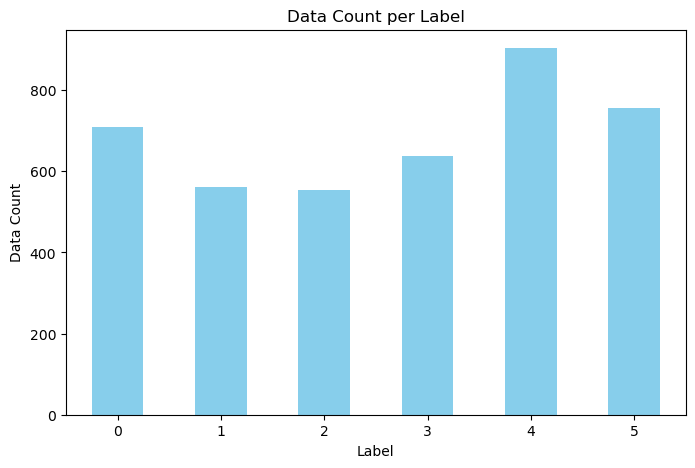

In [7]:
# Load data and plot label counts
data, labels = load_data(files_labels)
plot_label_counts(labels)